In [1]:
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import tensorflow as tf

In [2]:
local_zip='defungi.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('./defungi')
zip_ref.close()

In [3]:
train_H1_dir=os.path.join('C:/Users/Admin/anaconda3/Scripts/Defungi/defungi/H1')
train_H2_dir=os.path.join('C:/Users/Admin/anaconda3/Scripts/Defungi/defungi/H2')
train_H3_dir=os.path.join('C:/Users/Admin/anaconda3/Scripts/Defungi/defungi/H3')
train_H4_dir=os.path.join('C:/Users/Admin/anaconda3/Scripts/Defungi/defungi/H4')
train_H5_dir=os.path.join('C:/Users/Admin/anaconda3/Scripts/Defungi/defungi/H5')

train_H1_names = os.listdir(train_H1_dir)
print(train_H1_names[:10])

train_H2_names = os.listdir(train_H2_dir)
print(train_H2_names[:10])

['H1_100a_1.jpg', 'H1_100a_2.jpg', 'H1_100a_3.jpg', 'H1_100a_4.jpg', 'H1_100a_5.jpg', 'H1_100a_6.jpg', 'H1_100a_7.jpg', 'H1_100a_8.jpg', 'H1_100a_9.jpg', 'H1_101a_1.jpg']
['H2_102a_1.jpg', 'H2_102a_2.jpg', 'H2_102a_3.jpg', 'H2_102a_4.jpg', 'H2_102b_1.jpg', 'H2_102b_2.jpg', 'H2_102b_3.jpg', 'H2_102b_4.jpg', 'H2_103b_1.jpg', 'H2_103b_2.jpg']


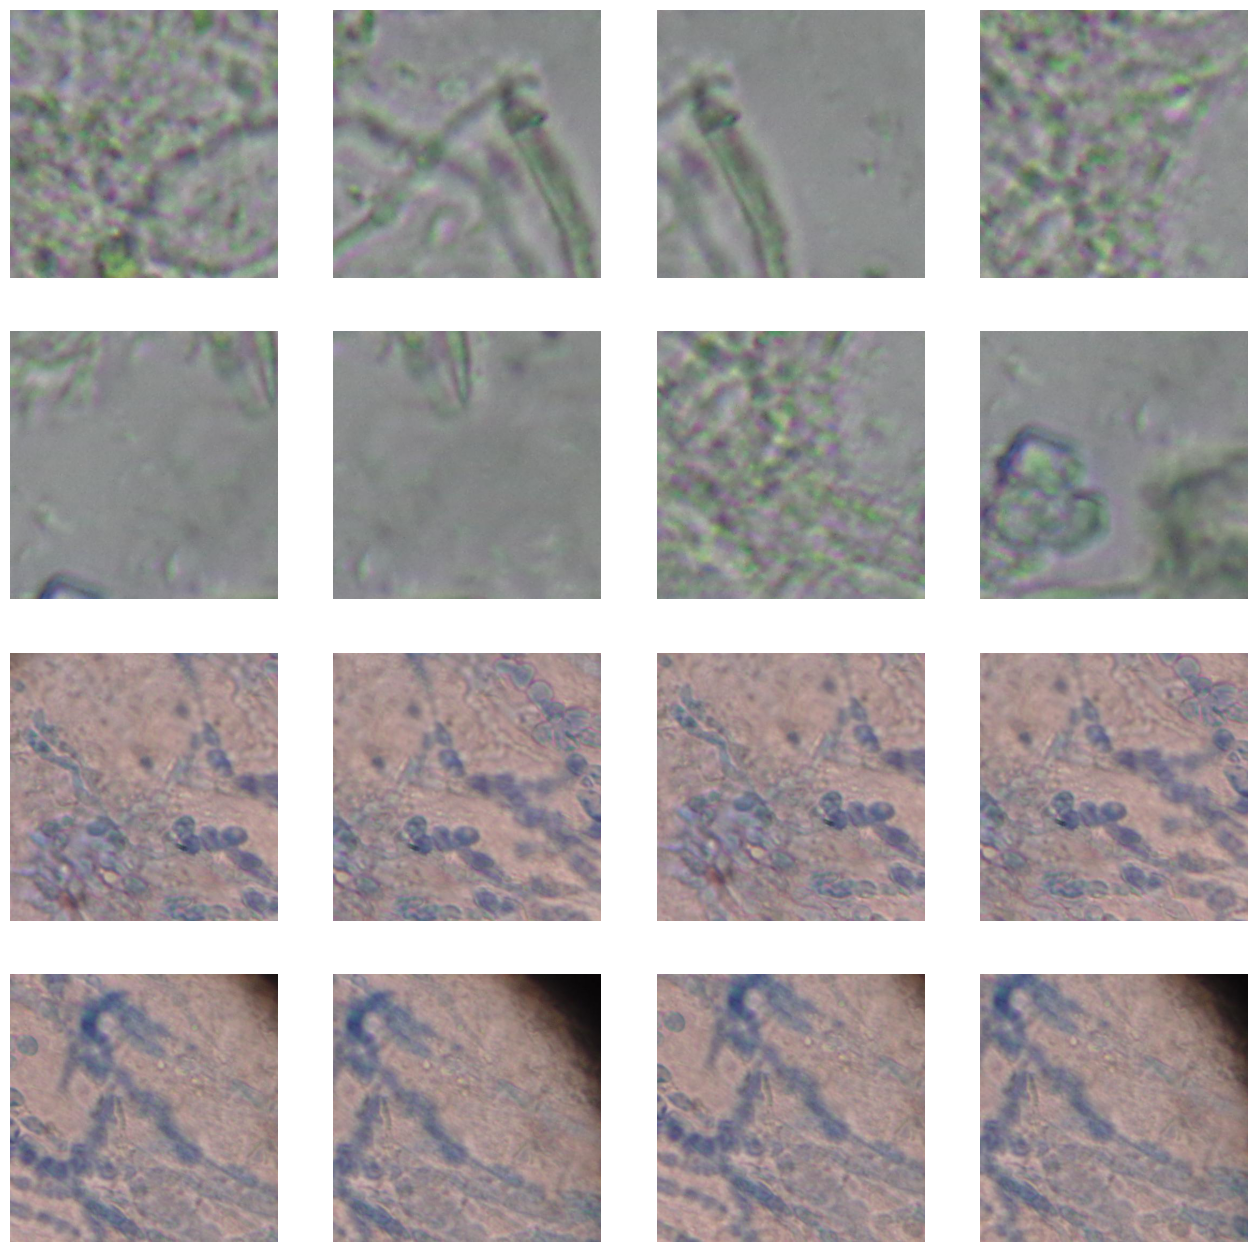

CPU times: total: 1.53 s
Wall time: 1.55 s


In [4]:
%%time
nrows=4
ncols=4
pic_index=0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index += 8
next_horse_pix = [os.path.join(train_H1_dir, fname) 
                for fname in train_H1_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_H2_dir, fname) 
                for fname in train_H2_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)

train_genrator=train_datagen.flow_from_directory(
    'defungi/',
    target_size=(500,500),
    batch_size=128,
    class_mode='categorical')

Found 9114 images belonging to 5 classes.


# Model

In [19]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(500, 500, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(5, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 498, 498, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 249, 249, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 247, 247, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 123, 123, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 121, 121, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 60, 60, 64)       

In [21]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
%%time
history=model.fit(train_genrator,steps_per_epoch=8,epochs=100,verbose=1)

Epoch 1/100
8/8 [==============================] - 73s 9s/step - loss: 1.8258 - accuracy: 0.3301
Epoch 2/100
8/8 [==============================] - 74s 9s/step - loss: 1.4086 - accuracy: 0.4512
Epoch 3/100
8/8 [==============================] - 76s 9s/step - loss: 1.4298 - accuracy: 0.4453
Epoch 4/100
8/8 [==============================] - 78s 10s/step - loss: 1.3200 - accuracy: 0.5088
Epoch 5/100
8/8 [==============================] - 79s 10s/step - loss: 1.5095 - accuracy: 0.4258
Epoch 6/100
8/8 [==============================] - 76s 9s/step - loss: 1.4627 - accuracy: 0.3916
Epoch 7/100
8/8 [==============================] - 73s 9s/step - loss: 1.3960 - accuracy: 0.4154
Epoch 8/100
8/8 [==============================] - 77s 10s/step - loss: 1.3389 - accuracy: 0.4346
Epoch 9/100
8/8 [==============================] - 77s 10s/step - loss: 1.3950 - accuracy: 0.4287
Epoch 10/100
8/8 [==============================] - 78s 10s/step - loss: 1.2918 - accuracy: 0.4795
Epoch 11/100
8/8 [======